In [307]:
import pandas as pd 
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
#reading data set

In [309]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [310]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The corelation between 'survived' and 'sex'

In [311]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [312]:
# There is correlation between sex and survived if the passanger is female the chances of survival is more!

# two visulizations, survived and age; gender and survived 

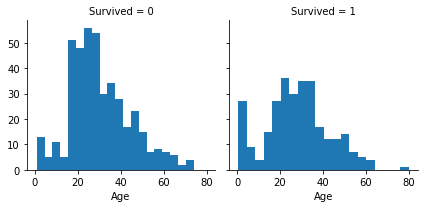

In [313]:
##Analyze by visualizing data and Correlating numerical features
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

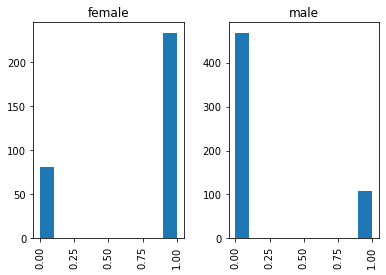

In [314]:
hist =train_df[["Sex", "Survived"]].hist(by='Sex')

In [315]:
# Implement SVM method using scikit-learn library and report the accuracy.
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [316]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Data cleaning 

In [317]:
train_df = train_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)

In [318]:
test_df = test_df.drop(['Ticket', 'Cabin','Parch','SibSp'], axis=1)

In [319]:
combine = [train_df,test_df]

In [320]:
##cleaning the data
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in combine:
     dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Jonkheer', 'Dona'], 'Lady')
     dataset['Title'] = dataset['Title'].replace(['Capt', 'Don', 'Major', 'Sir'], 'Sir')
     dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
     dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [321]:
title_mapping = {"Col": 1, "Dr": 2, "Lady": 3, "Master": 4, "Miss": 5, "Mr": 6, "Mrs": 7, "Rev": 8, "Sir": 9}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [322]:
#droping the Name feature from training and testing datasets
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

In [323]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
freq_port = train_df.Embarked.dropna().mode()[0]
meanAge = int(train_df.Age.dropna().mean())

In [324]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    dataset['Age'] = dataset['Age'].fillna(meanAge)
    dataset['Fare'] = dataset['Fare'].fillna(test_df['Fare'].dropna().median())

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)

In [325]:
combine[0].to_csv('train_preprocessed.csv',index=False)
combine[1].to_csv('test_preprocessed.csv',index=False)

In [326]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
# reading data set using read method 
train_df = pd.read_csv('train_preprocessed.csv')
test_df = pd.read_csv('test_preprocessed.csv')

In [327]:

# dropping target column from data set

X_train = train_df.drop("Survived", axis=1)

# appending target column to traning data set 

Y_train = train_df["Survived"]

In [328]:
# splitting data set into 80:20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=0)

In [329]:
X_train

,Pclass,Sex,Age,Fare,Embarked,Title
140,3,1,29.0,15.2458,1,7
439,2,0,31.0,10.5000,0,6
817,2,0,31.0,37.0042,1,6
378,3,0,20.0,4.0125,1,6
491,3,0,21.0,7.2500,0,6
...,...,...,...,...,...,...
835,1,1,39.0,83.1583,1,5
192,3,1,19.0,7.8542,0,5
629,3,0,29.0,7.7333,2,6
559,3,1,36.0,17.4000,0,7


In [330]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title
495,3,0,29.0,14.4583,1,6
648,3,0,29.0,7.5500,0,6
278,3,0,7.0,29.1250,2,4
31,1,1,29.0,146.5208,1,7
255,3,1,29.0,15.2458,1,7
...,...,...,...,...,...,...
780,3,1,13.0,7.2292,1,5
837,3,0,29.0,8.0500,0,6
215,1,1,31.0,113.2750,1,5
833,3,0,23.0,7.8542,0,6


In [331]:
Y_train.head(2)

140    0
439    0
Name: Survived, dtype: int64

In [332]:
Y_test.head(2)

495    0
648    0
Name: Survived, dtype: int64

In [333]:
# finding correlaton between sex and survived columns 
print("correlation between sex and survived:")
cor = train_df[["Sex","Survived"]].corr()
print(cor)

correlation between sex and survived:
               Sex  Survived
Sex       1.000000  0.543351
Survived  0.543351  1.000000


# Training Models - SVM;Naive Bayes, KNN

In [334]:
#svm
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
ACC_SVC = round(svc.score(X_train, Y_train)*100,1)
print("SVM accuracy is : ", ACC_SVC)

SVM accuracy is :  66.4


In [335]:
# finding accuracy using navie bais
# Gaussian
Gaus = GaussianNB()
y_pred = nav.fit(X_train, Y_train).predict(X_test)
acc_knn = round(nav.score(X_train, Y_train) * 100, 2)
print("GausNB accuracy is:",acc_knn)

GausNB accuracy is: 78.09


In [336]:
from sklearn.naive_bayes import MultinomialNB

In [337]:
#Multinomial
Mnb = MultinomialNB()
y_pred = Mnb.fit(X_train, Y_train).predict(X_test)
acc_knn = round(Mnb.score(X_train, Y_train) * 100, 2)
print("MNB accuracy is:",acc_knn)

MNB accuracy is: 68.12


In [338]:
from sklearn.naive_bayes import BernoulliNB

In [339]:
#Bernoulli
Bnb = BernoulliNB()
y_pred = Bnb.fit(X_train, Y_train).predict(X_test)
acc_knn = round(Bnb.score(X_train, Y_train) * 100, 2)
print("Bnb accuracy is:",acc_knn)

Bnb accuracy is: 78.65


In [340]:
#knn K NEAREST NEIGHBOURS

In [341]:
from sklearn.neighbors import KNeighborsClassifier

In [342]:
knn = KNeighborsClassifier(n_neighbors = 3)
n = knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
print("Knei accuracy is:",acc_knn)

Knei accuracy is: 82.72


In [343]:
n

KNeighborsClassifier(n_neighbors=3)

In [344]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

# Confusion Matrix

In [345]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 

In [346]:
#SVM confusion matrix
pred = cross_val_predict(svc, X_train, Y_train, cv=3)
confusion_matrix(Y_train,pred)

array([[404,  35],
       [210,  63]], dtype=int64)

In [347]:
#Naive bayes- gausian confusion matrix
pred = cross_val_predict(Gaus, X_train, Y_train, cv=3)
confusion_matrix(Y_train,pred)

array([[351,  88],
       [ 66, 207]], dtype=int64)

In [348]:
#Naive bayes- Multinomial confusion matrix
pred = cross_val_predict(Mnb, X_train, Y_train, cv=3)
confusion_matrix(Y_train,pred)

array([[366,  73],
       [149, 124]], dtype=int64)

In [349]:
#Naive bayes- Bernoulli confusion matrix
pred = cross_val_predict(Bnb, X_train, Y_train, cv=3)
confusion_matrix(Y_train,pred)

array([[376,  63],
       [ 89, 184]], dtype=int64)

In [350]:
#Naive KNN confusion matrix
pred = cross_val_predict(knn, X_train, Y_train, cv=3)
confusion_matrix(Y_train,pred)

array([[339, 100],
       [129, 144]], dtype=int64)

# part 2

In [351]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [352]:
## Load the digits dataset: digits
digits = datasets.load_digits()

In [353]:
# Explore the dataset
print(digits.keys())
print(digits.DESCR)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

In [354]:
# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

(1797, 8, 8)
(1797, 64)


In [355]:
# Create feature and target arrays
X = digits.data
y = digits.target

In [356]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2, stratify=y)

# SVM Algorithm 

In [357]:
svm = SVC(kernel = 'linear', gamma= 0.1, C=10)
svm.fit(X_train,y_train)


SVC(C=10, gamma=0.1, kernel='linear')

In [358]:
svm.score(X_test, y_test)

0.9833333333333333

In [359]:
from sklearn.metrics import classification_report 
predictions = svm.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      1.00      0.97        36
           2       1.00      1.00      1.00        35
           3       0.93      1.00      0.96        37
           4       1.00      1.00      1.00        36
           5       1.00      0.97      0.99        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       1.00      0.97      0.99        35
           9       1.00      0.92      0.96        36

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



# Naive bayes all three : Gausian,multinomial,bernoulli

# Bernoulli

In [360]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [361]:
Bnb = BernoulliNB()
Bnb.fit(X_train,y_train)

BernoulliNB()

In [362]:
Bnb.score(X_test, y_test)

0.8305555555555556

In [363]:
prediction = Bnb.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.75      0.58      0.66        36
           2       0.76      0.80      0.78        35
           3       0.88      0.76      0.81        37
           4       0.92      0.94      0.93        36
           5       0.88      0.78      0.83        37
           6       0.97      0.94      0.96        36
           7       0.89      0.92      0.90        36
           8       0.63      0.74      0.68        35
           9       0.68      0.83      0.75        36

    accuracy                           0.83       360
   macro avg       0.84      0.83      0.83       360
weighted avg       0.84      0.83      0.83       360



# Gausian

In [364]:
Gaus = GaussianNB()
Gaus.fit(X_train,y_train)

GaussianNB()

In [365]:
Gaus.score(X_test, y_test)

0.8944444444444445

In [366]:
predictionSS = Gaus.predict(X_test)
print(classification_report(y_test,predictionSS))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.91      0.89      0.90        36
           2       0.90      0.80      0.85        35
           3       0.97      0.76      0.85        37
           4       0.97      0.92      0.94        36
           5       0.89      0.92      0.91        37
           6       0.95      0.97      0.96        36
           7       0.75      1.00      0.86        36
           8       0.77      0.94      0.85        35
           9       0.93      0.78      0.85        36

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.91      0.89      0.89       360



# multinomial 

In [367]:
Mnb = MultinomialNB()
Mnb.fit(X_train,y_train)

MultinomialNB()

In [368]:
Mnb.score(X_test, y_test)

0.8861111111111111

In [369]:
predictionSSg = Mnb.predict(X_test)
print(classification_report(y_test,predictionSSg))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.83      0.69      0.76        36
           2       0.81      0.86      0.83        35
           3       1.00      0.84      0.91        37
           4       0.97      0.97      0.97        36
           5       1.00      0.78      0.88        37
           6       1.00      0.97      0.99        36
           7       0.90      1.00      0.95        36
           8       0.73      0.86      0.79        35
           9       0.73      0.92      0.81        36

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360



# KNN algorithms 

In [370]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)


In [371]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [372]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9888888888888889


# Visulization 

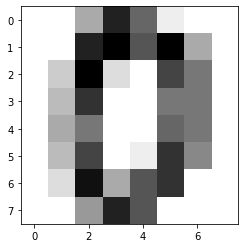

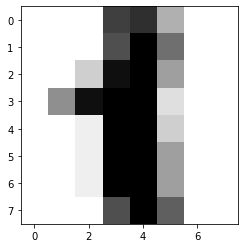

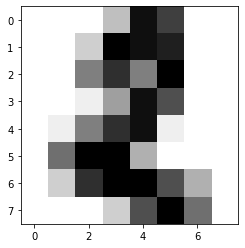

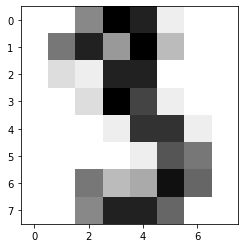

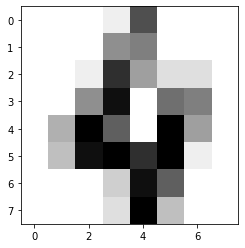

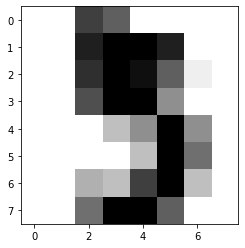

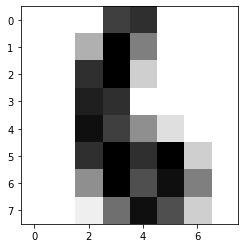

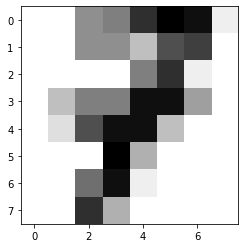

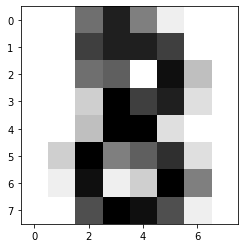

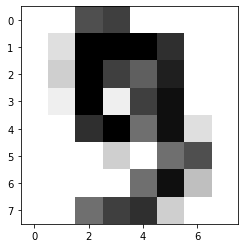

In [373]:
for i in range(10):
    #(digits.images[i])
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()
    #plt.imshow(randomimage, cmap=plt.cm.gray_r, interpolation='nearest')
    

In [374]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [375]:
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    
    print ("For the neighbours " + str(k) + " the accuracy is:" + str(test_accuracy[i]) )
    

For the neighbours 1 the accuracy is:0.9805555555555555
For the neighbours 2 the accuracy is:0.9777777777777777
For the neighbours 3 the accuracy is:0.9861111111111112
For the neighbours 4 the accuracy is:0.9805555555555555
For the neighbours 5 the accuracy is:0.9833333333333333
For the neighbours 6 the accuracy is:0.9833333333333333
For the neighbours 7 the accuracy is:0.9888888888888889
For the neighbours 8 the accuracy is:0.9833333333333333


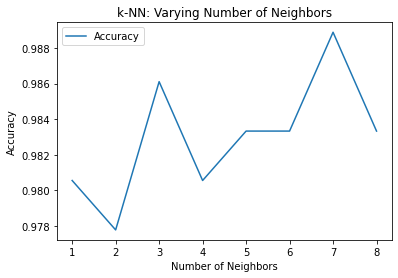

In [376]:
# Generate plot of accuricies 
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# Evaluating an image and visualize its own class

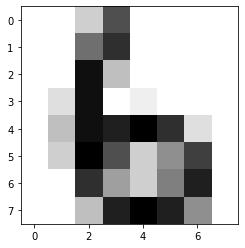

In [377]:
plt.imshow(X_test[4].reshape(8,8), cmap = 'binary')

In [378]:
predictionSSg[4] #using multinomial prediction algorithem 

6

# Our prediction is correct 